In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from data_quality import *
import seaborn as sns

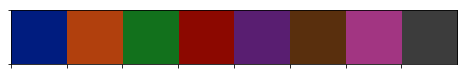

In [2]:
sns.palplot(sns.color_palette("dark", 8))
sns.set(font_scale=1.2)
# sns.set_style("whitegrid")
sns.set_style("white")

In [3]:
clean_flights, dirty_flights = partition_data_files('tmp/FLIGHTS/*.csv')
clean_fb, dirty_fb = partition_data_files('tmp/FBPosts2/*.csv')

In [5]:
# flights_clean_completeness_ratio_df, flights_dirty_completeness_ratio_df = completeness_dataframes(clean_flights, dirty_flights)

In [6]:
# fb_clean_completeness_ratio_df, fb_dirty_completeness_ratio_df = completeness_dataframes(clean_fb, dirty_fb)

In [7]:
# flights_clean_distinct_counts_df, flights_dirty_distinct_counts_df = distinct_counts_dataframes(clean_flights, dirty_flights)

In [8]:
# fb_clean_distinct_counts_df, fb_dirty_distinct_counts_df = distinct_counts_dataframes(clean_fb, dirty_fb)

### Initial Metric Analysis

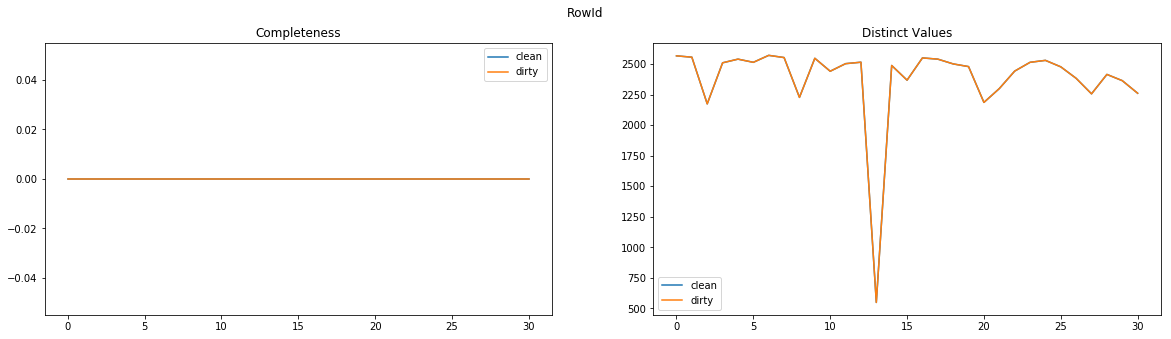

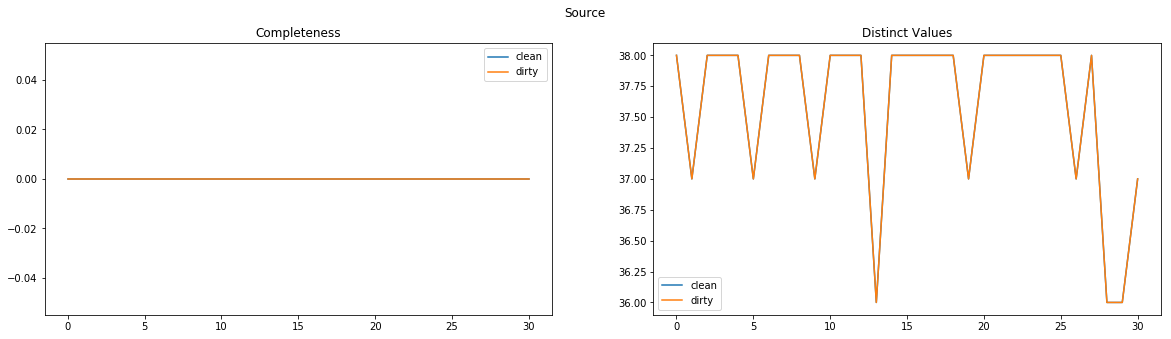

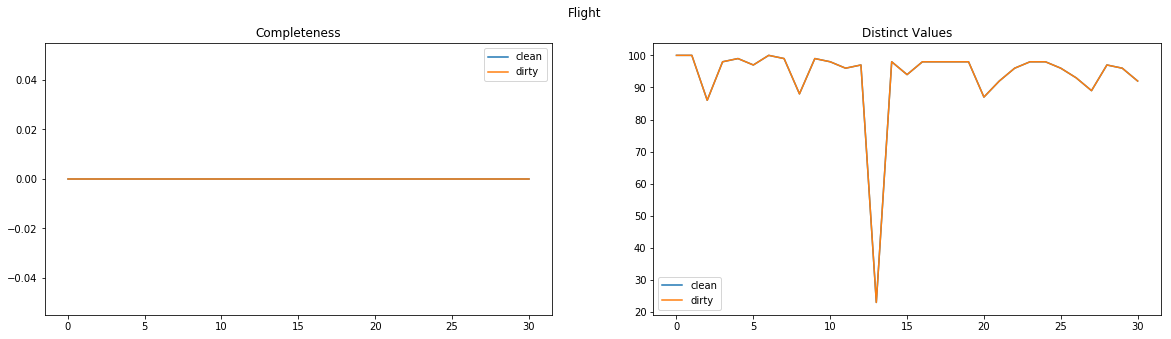

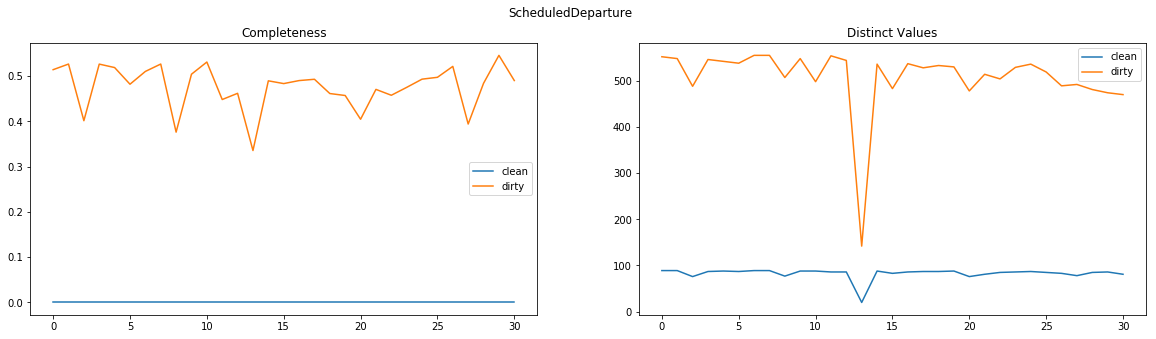

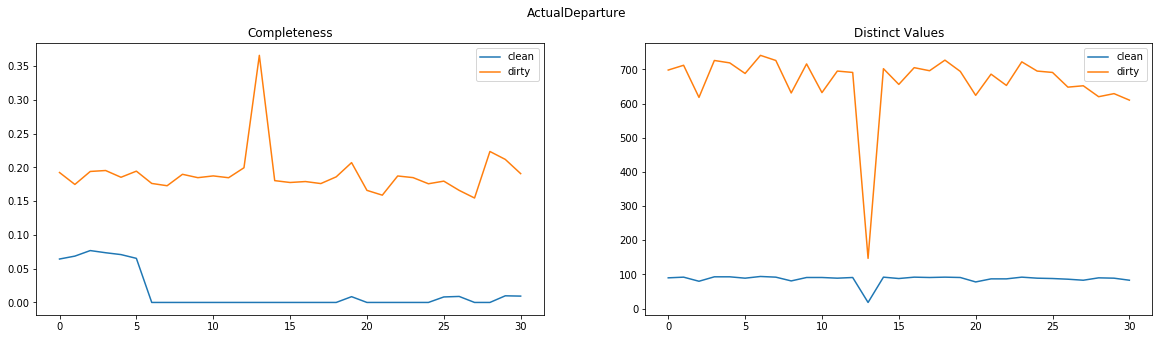

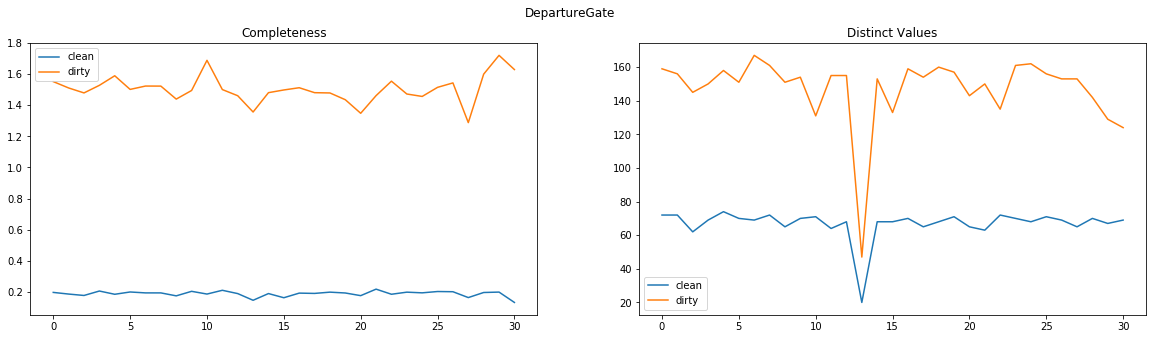

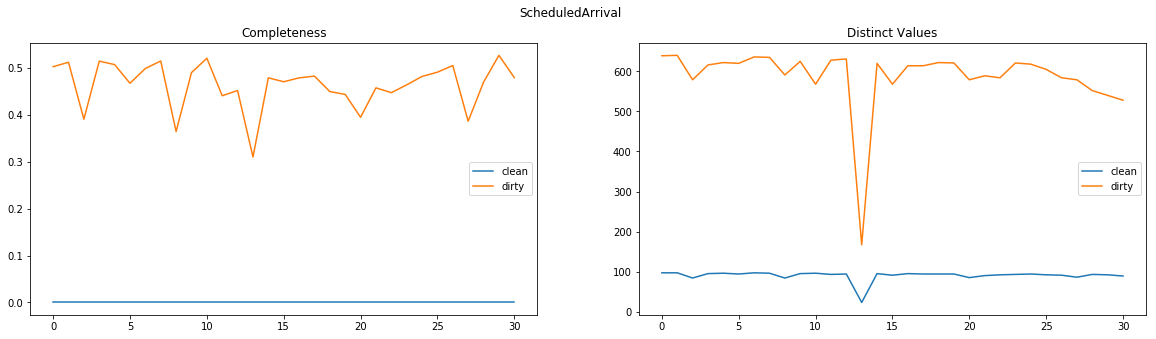

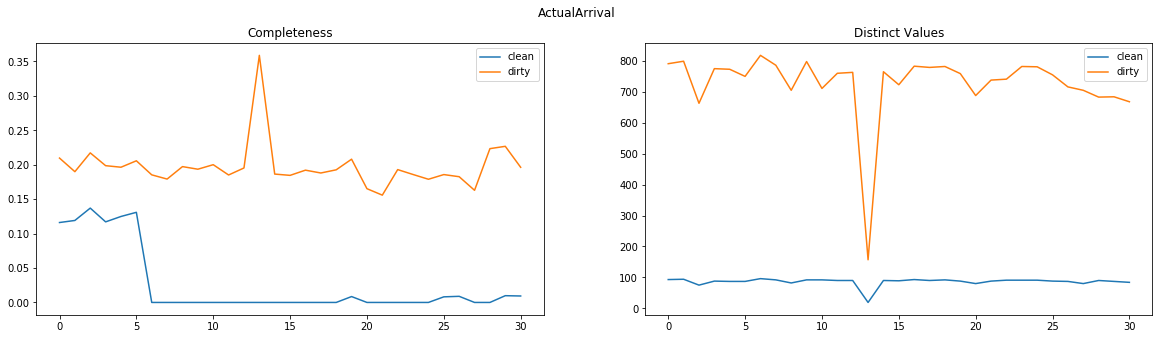

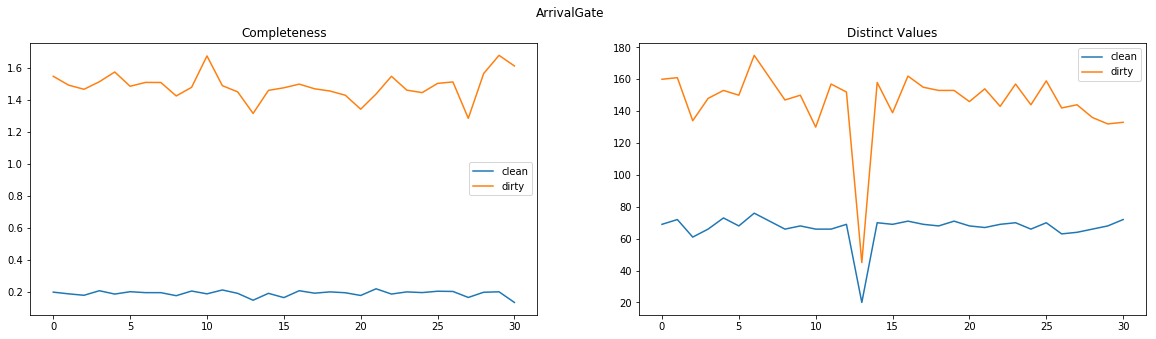

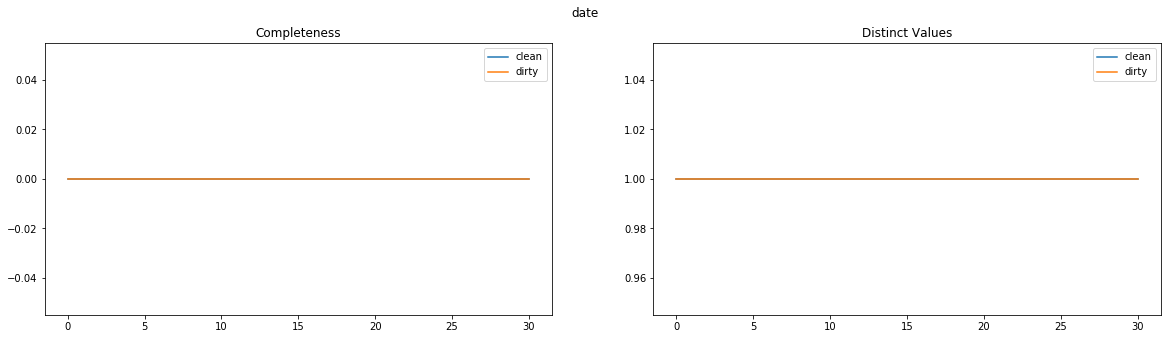

In [12]:
for column in flights_dirty_completeness_ratio_df.index.tolist():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle(column)
    ax1.title.set_text('Completeness')
    ax2.title.set_text('Distinct Values')
    ax1.plot(np.arange(flights_clean_completeness_ratio_df.shape[1]), flights_clean_completeness_ratio_df.loc[column].values, label = 'clean')
    ax1.plot(np.arange(flights_dirty_completeness_ratio_df.shape[1]), flights_dirty_completeness_ratio_df.loc[column].values, label = 'dirty')
    ax2.plot(np.arange(flights_clean_distinct_counts_df.shape[1]), flights_clean_distinct_counts_df.loc[column].values, label = 'clean')
    ax2.plot(np.arange(flights_dirty_distinct_counts_df.shape[1]), flights_dirty_distinct_counts_df.loc[column].values, label = 'dirty')
    ax1.legend()
    ax2.legend()
    plt.show()

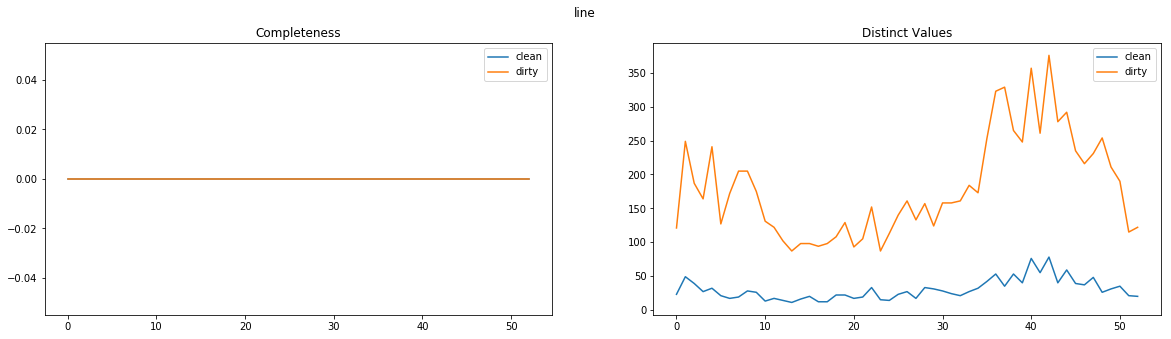

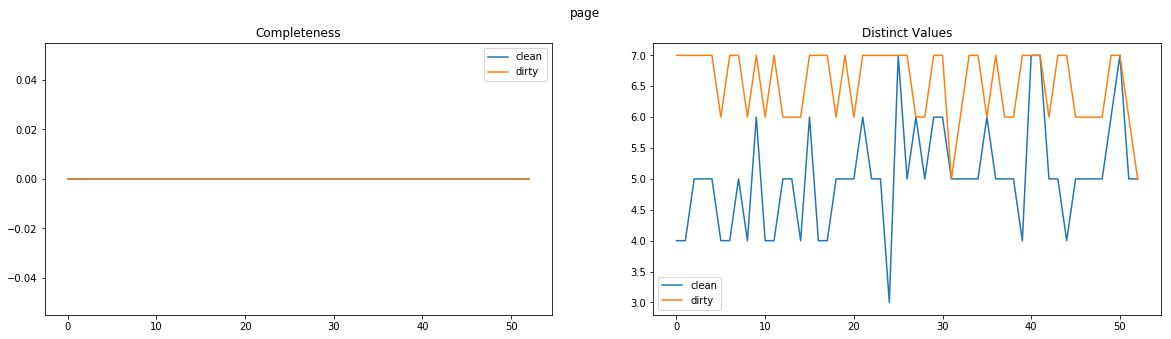

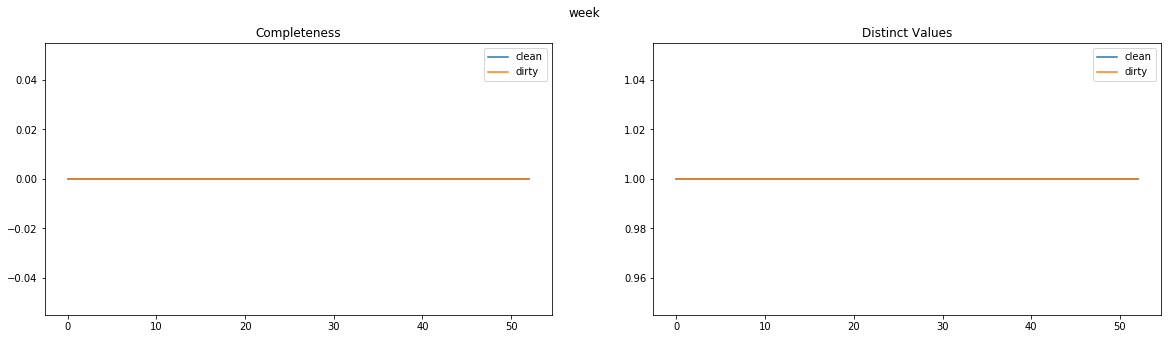

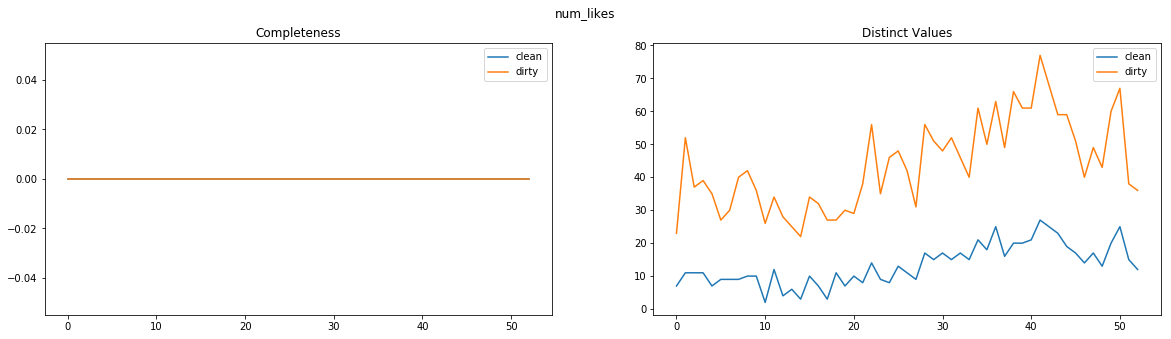

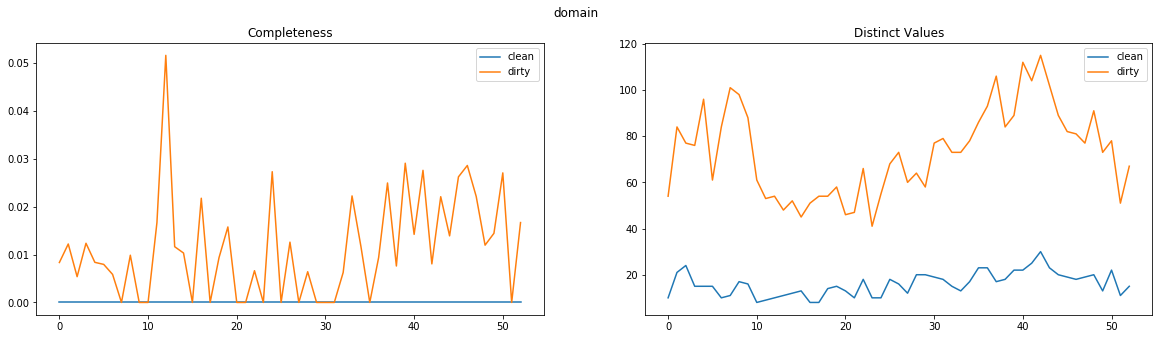

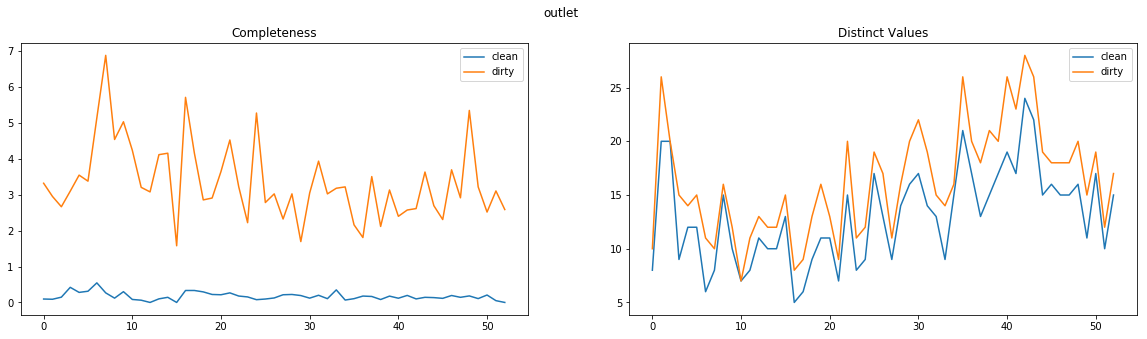

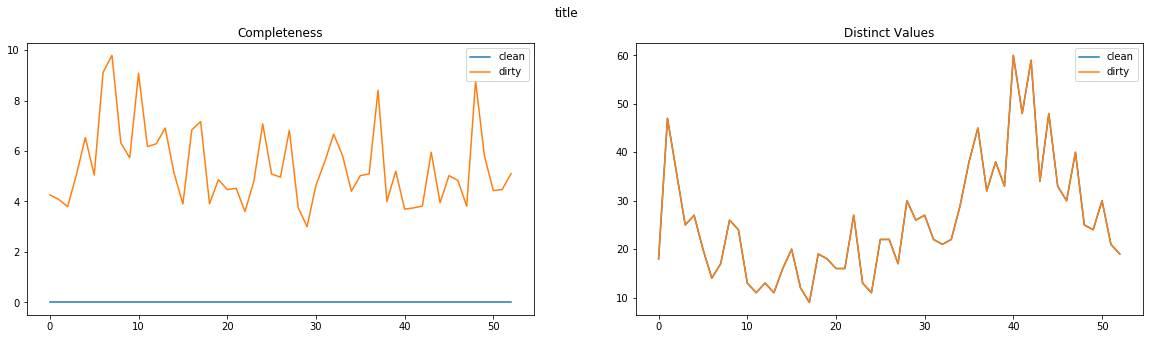

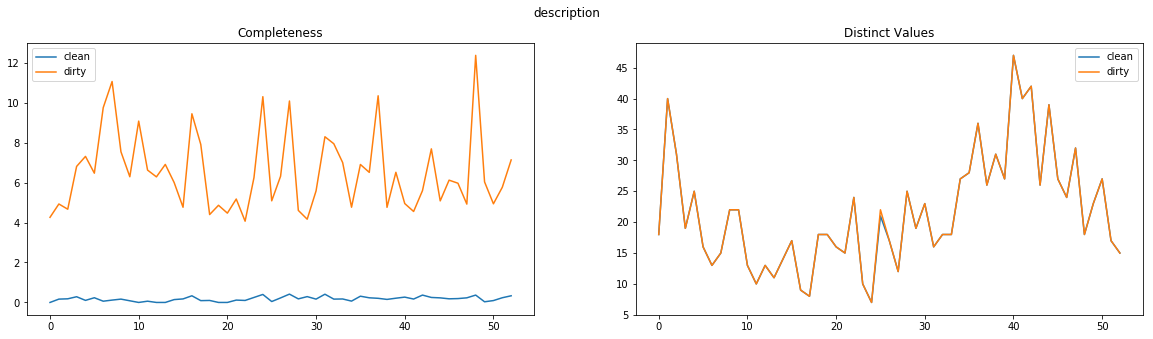

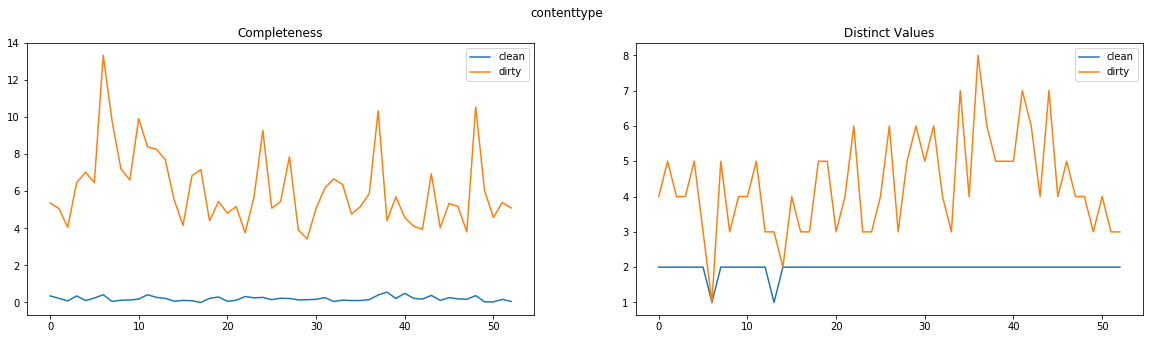

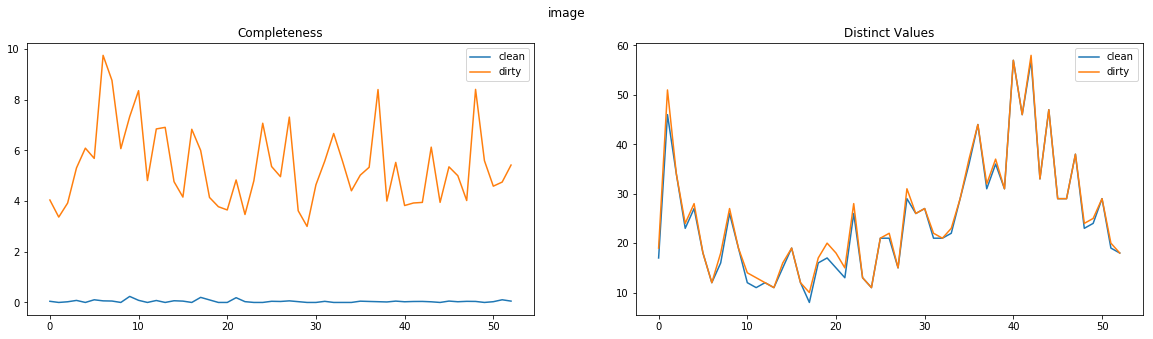

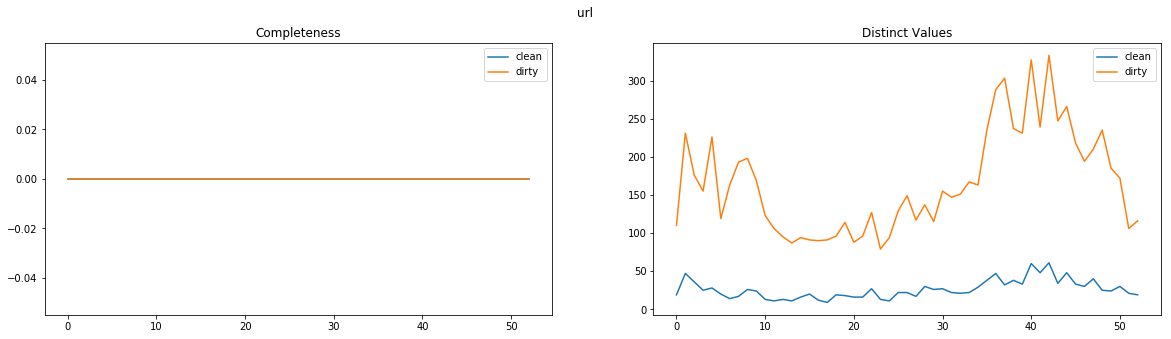

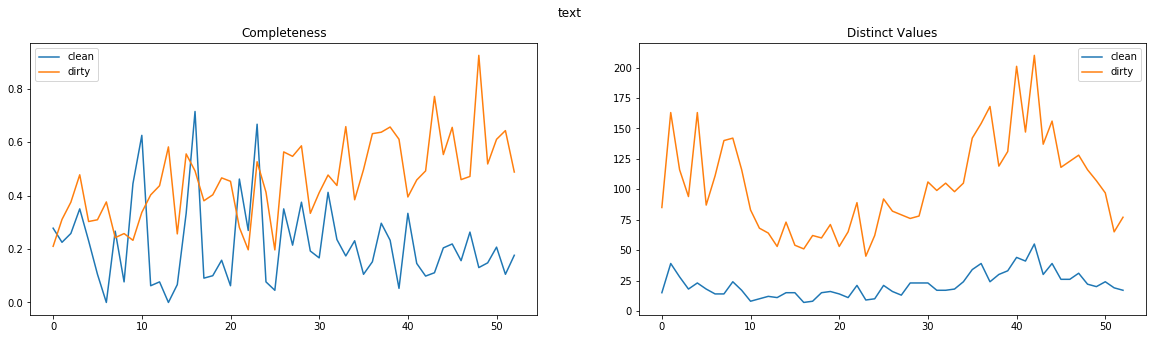

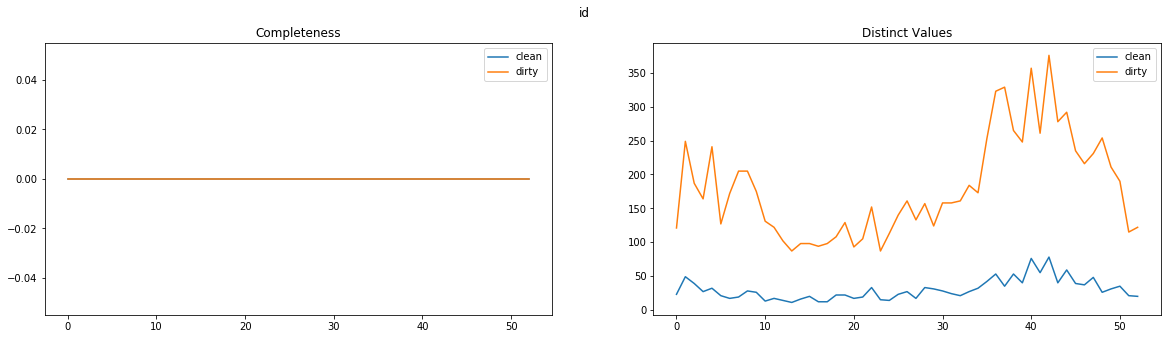

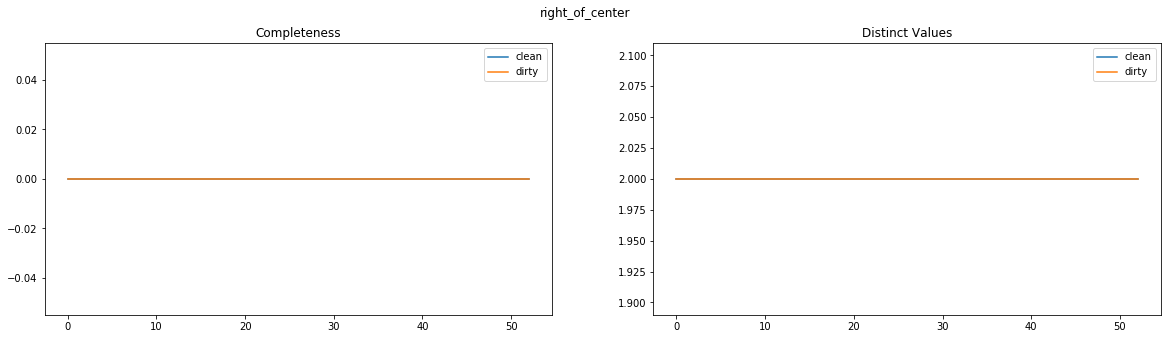

In [8]:
for column in fb_dirty_completeness_ratio_df.index.tolist():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    fig.suptitle(column)
    ax1.title.set_text('Completeness')
    ax2.title.set_text('Distinct Values')
    ax1.plot(np.arange(fb_clean_completeness_ratio_df.shape[1]), fb_clean_completeness_ratio_df.loc[column].values, label = 'clean')
    ax1.plot(np.arange(fb_dirty_completeness_ratio_df.shape[1]), fb_dirty_completeness_ratio_df.loc[column].values, label = 'dirty')
    ax2.plot(np.arange(fb_clean_distinct_counts_df.shape[1]), fb_clean_distinct_counts_df.loc[column].values, label = 'clean')
    ax2.plot(np.arange(fb_dirty_distinct_counts_df.shape[1]), fb_dirty_distinct_counts_df.loc[column].values, label = 'dirty')
    ax1.legend()
    ax2.legend()
    plt.show()

### Data Validation Experiments

In [5]:
fb_analysis = pd.DataFrame(columns=['train_type', 'batch_size', 'test_batch', 'clean_correct', 'dirty_correct'])
counter = 0

for train_type in ['rolling', 'increasing']:
    for batch_size in range(1, 10):
        for i in range(len(clean_fb)-batch_size):
            row = analysis(i, train_type, clean_fb, dirty_fb, batch_size)
            fb_analysis.loc[counter] = row
            counter = counter + 1
# fb_analysis.to_csv('fb_batch_analysis.csv', index = False)

In [151]:
fb_accuracy = get_accuracy(fb_analysis)
fb_accuracy.to_csv('fb_accuracy.csv', index = False)

In [153]:
flights_analysis = pd.DataFrame(columns=['train_type', 'batch_size', 'test_batch', 'clean_correct', 'dirty_correct'])
counter = 0

for train_type in ['rolling', 'increasing']:
    for batch_size in range(1, 10):
        for i in range(len(clean_flights)-batch_size):
            row = analysis(i, train_type, clean_flights, dirty_flights, batch_size)
            flights_analysis.loc[counter] = row
            counter = counter + 1
flights_analysis.to_csv('flights_batch_analysis.csv', index = False)

In [154]:
flights_accuracy = get_accuracy(flights_analysis)
flights_accuracy.to_csv('flights_accuracy.csv', index = False)

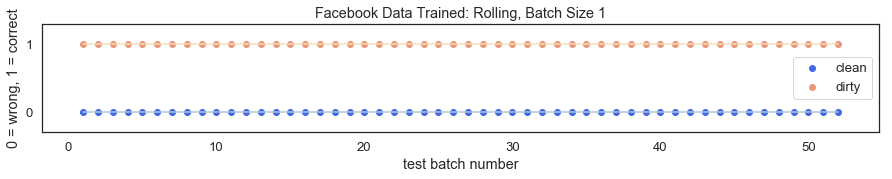

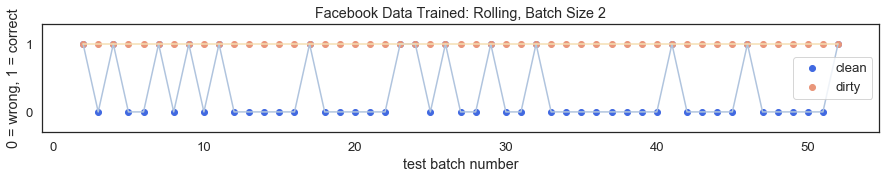

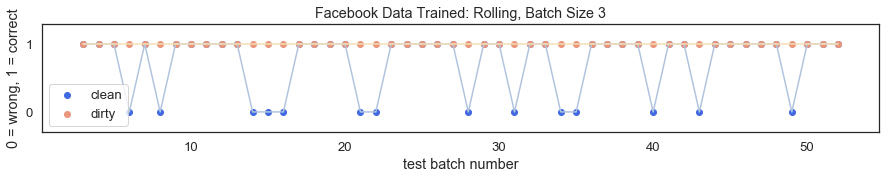

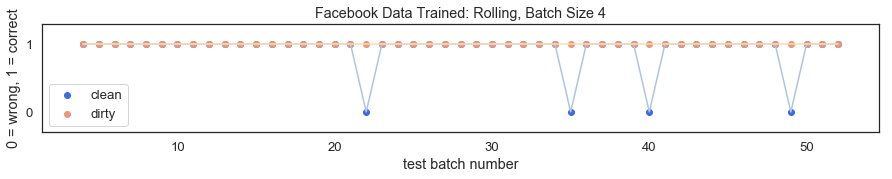

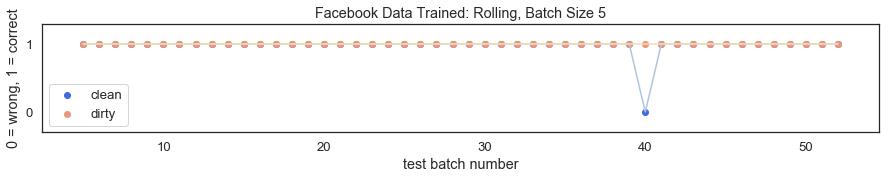

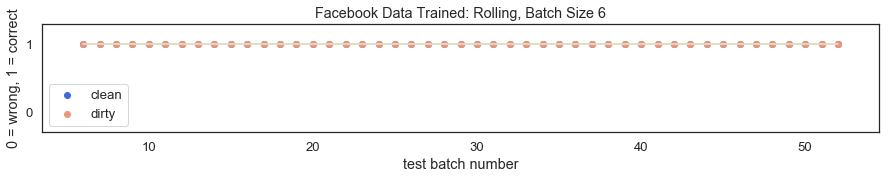

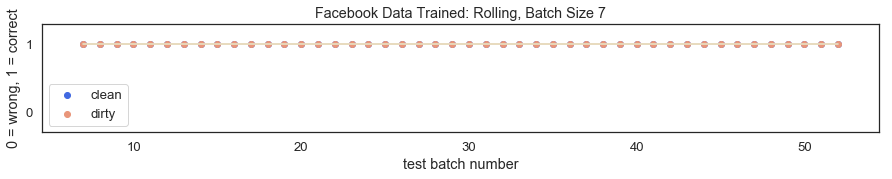

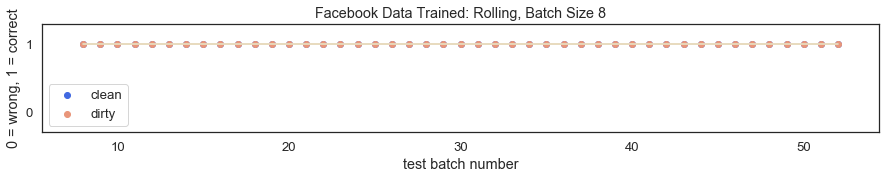

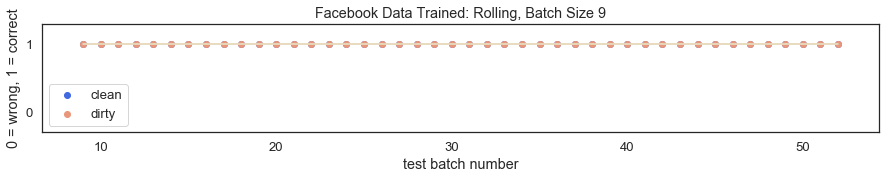

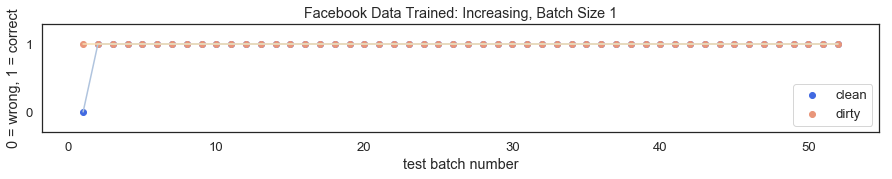

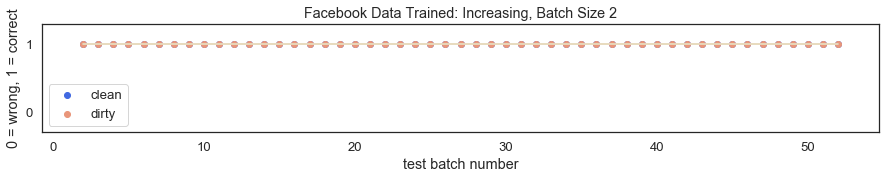

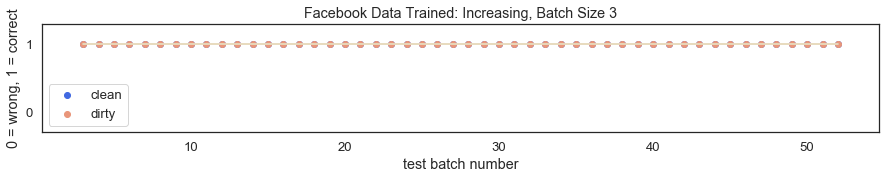

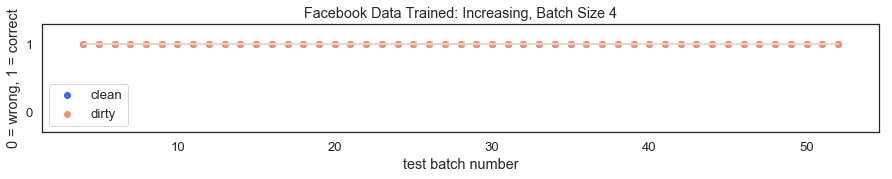

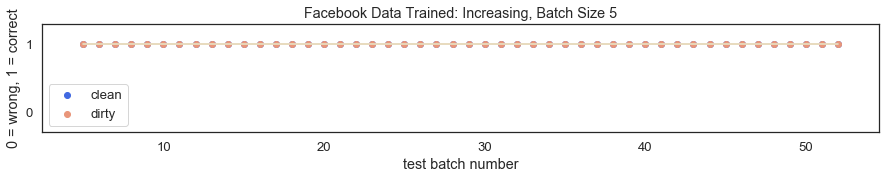

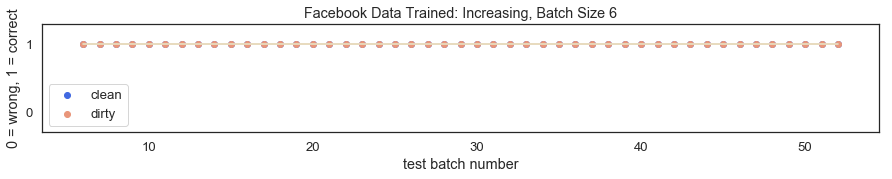

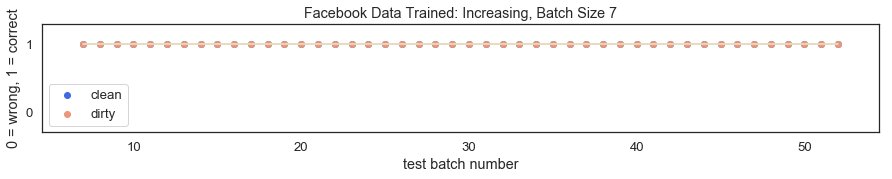

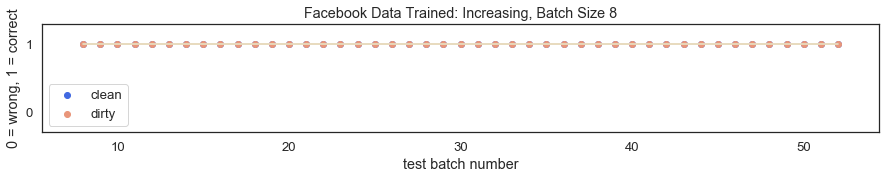

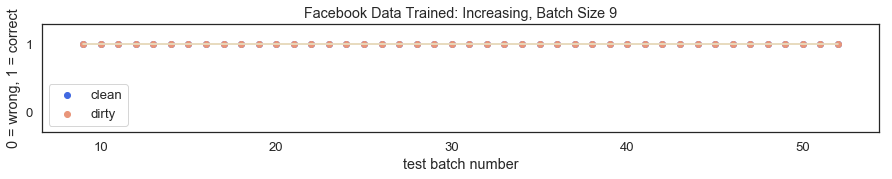

In [155]:
plot_batch('facebook', fb_analysis, range(1, 10))

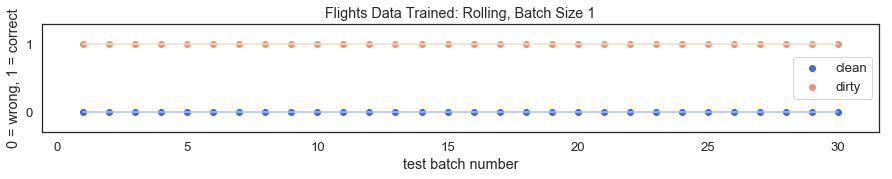

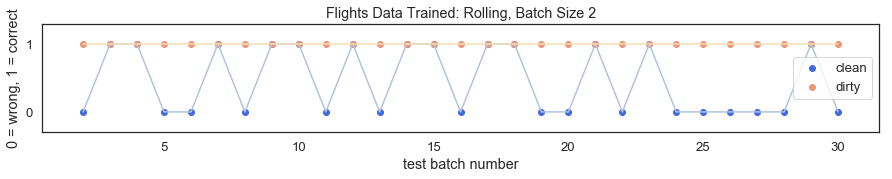

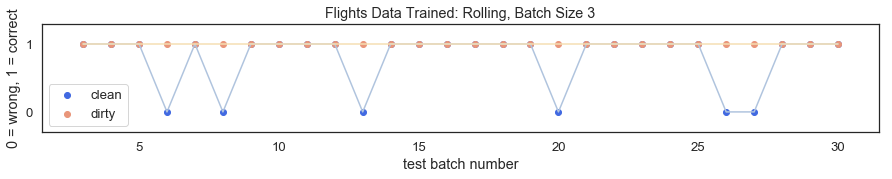

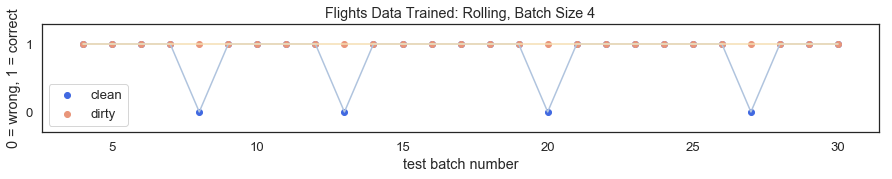

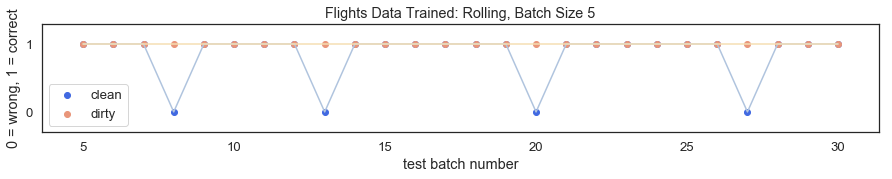

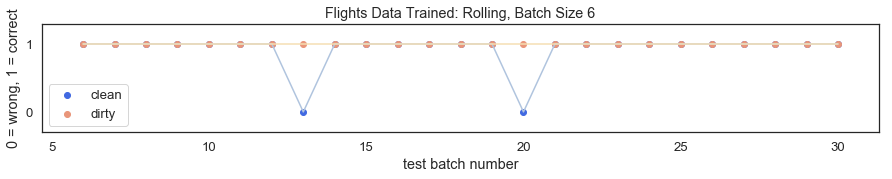

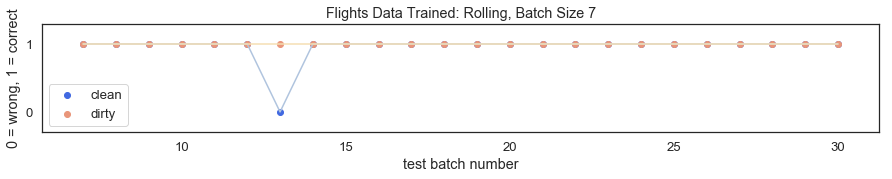

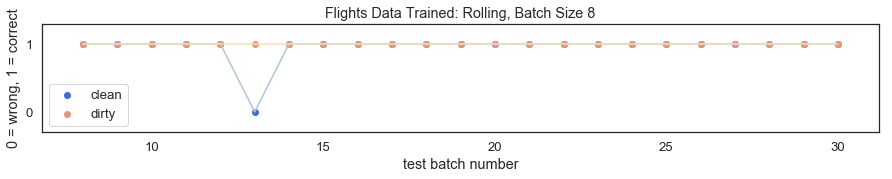

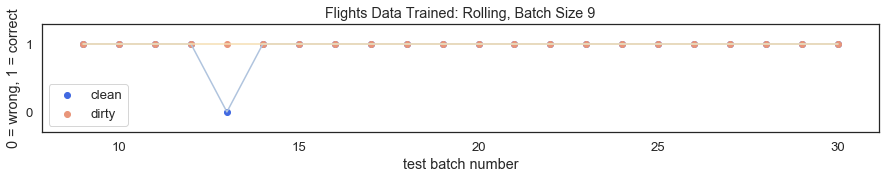

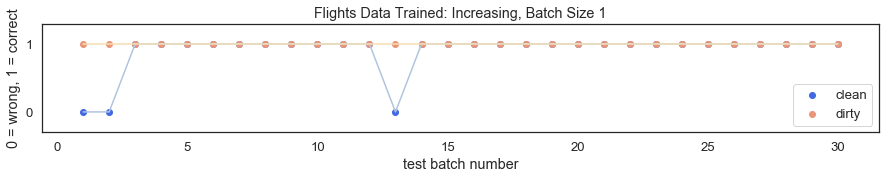

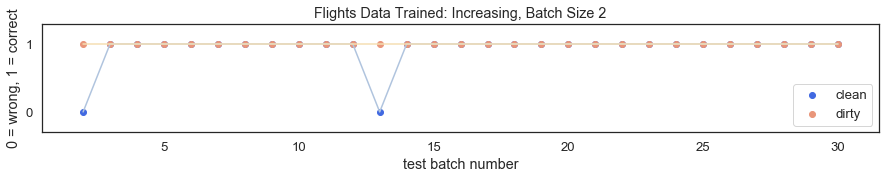

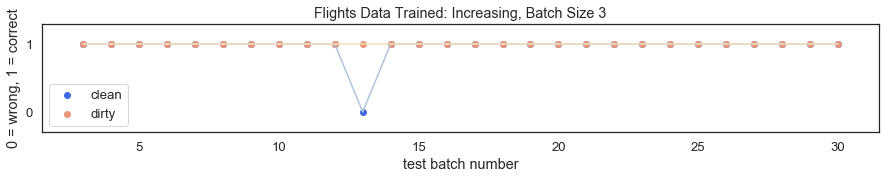

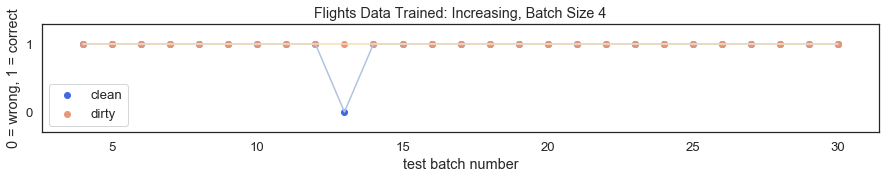

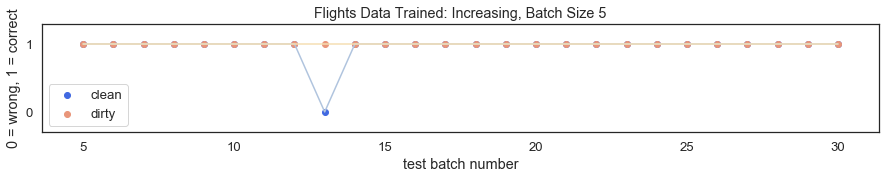

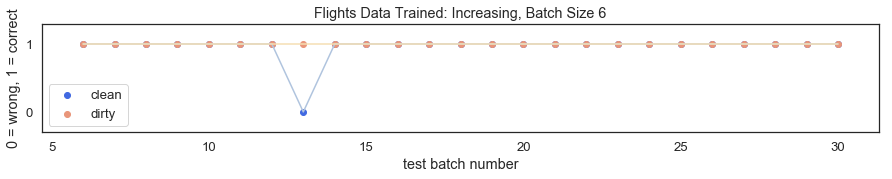

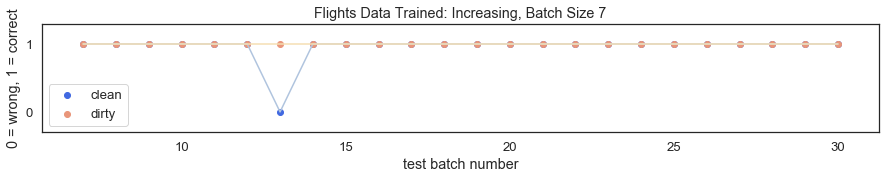

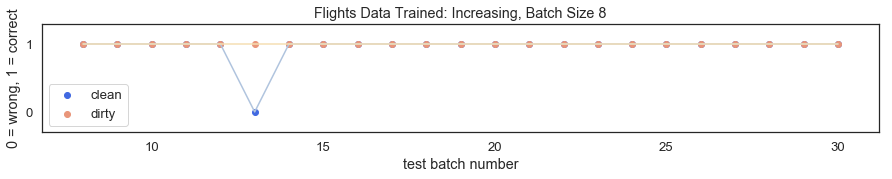

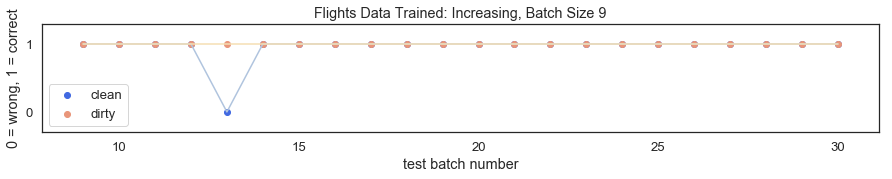

In [156]:
plot_batch('flights', flights_analysis, range(1, 10))

In [157]:
fb_accuracy

,train_type,batch_size,accuracy
0,increasing,1,0.990385
1,increasing,2,1.000000
2,increasing,3,1.000000
3,increasing,4,1.000000
4,increasing,5,1.000000
5,increasing,6,1.000000
6,increasing,7,1.000000
7,increasing,8,1.000000
8,increasing,9,1.000000
9,rolling,1,0.500000


In [158]:
flights_accuracy

,train_type,batch_size,accuracy
0,increasing,1,0.950000
1,increasing,2,0.965517
2,increasing,3,0.982143
3,increasing,4,0.981481
4,increasing,5,0.980769
5,increasing,6,0.980000
6,increasing,7,0.979167
7,increasing,8,0.978261
8,increasing,9,0.977273
9,rolling,1,0.500000
